# **Lab2-Logistic Regression: Part 1– Understand the Impact of Regularisation and Classification Metrics- MD IMTIAZ HABIB**

# ***Section-1: Explanation Step by Step***

# Step 1: Imports Libraries
In this code block, I import essential libraries for my machine learning task: numpy for numerical operations, matplotlib.pyplot for creating plots, load_diabetes to access the diabetes dataset, LogisticRegression for building the classification model, train_test_split to split the data into training and testing sets, RobustScaler for scaling features robustly, and classification_report and confusion_matrix for evaluating the model's performance.


In [21]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report, confusion_matrix

**Step 1.1: Loading Dataset**

I load the Iris dataset using the load_iris() function from sklearn. I assign the feature data to X and the target labels to y. This prepares the data for further processing and modeling.

In [22]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

**Step 1.2: Splitting the Dataset**

I split the Iris dataset into training and test sets using the train_test_split() function. I allocate 80% of the data for training (X_train and y_train) and 20% for testing (X_test and y_test). The random_state=42 ensures that the split is reproducible in future runs.

In [23]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Building a Pipeline with a RobustScaler Step & and Fitting a Model Without Regularization

Create a Pipeline and Fit Model Without Regularization
In this step, I will create a pipeline that applies RobustScaler to normalize the data, followed by logistic regression without regularization (penalty=None). I will then compare the mean and standard deviation of the model's coefficients.

In [50]:
# Create a pipeline with RobustScaler and LogisticRegression without regularization
pipeline_none = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', LogisticRegression(penalty=None, max_iter=1000))  # No regularization
])

**Step 2.1: Fitting the Pipeline**

I fit the pipeline on the training data using the fit method, which trains the logistic regression model by optimizing its coefficients based on the input features (X_train) and their corresponding labels (y_train).

After fitting, I extract the coefficients of the trained logistic regression model from the pipeline by accessing the classifier step and retrieving the coef_ attribute, which contains the weights learned by the model for each feature.

In [25]:
# Fit the pipeline on training data
pipeline_none.fit(X_train, y_train)

# Extract the coefficients of the logistic regression model
coefficients_none = pipeline_none.named_steps['classifier'].coef_

**Step 2.2: Displaying the Mean and Std for Without Regularization**

I calculate the mean and standard deviation of the coefficients obtained from the logistic regression model using np.mean() and np.std(). The mean provides a measure of the central tendency of the coefficients, indicating their average value, while the standard deviation measures the variability or spread of these coefficients.

Finally, I print the results, showing the mean and standard deviation of the coefficients for the model without regularization.

In [26]:
# Compare the mean and standard deviation of the coefficients
mean_none = np.mean(coefficients_none)
std_none = np.std(coefficients_none)

print(f"Mean of coefficients (No regularization): {mean_none}")
print(f"Standard deviation of coefficients (No regularization): {std_none}")

Mean of coefficients (No regularization): 8.289665250534503e-15
Standard deviation of coefficients (No regularization): 12.049563434421833


# Step 3: Fit Models with L1 and L2 Regularization
In this step, I will train logistic regression models with L1 and L2 regularization. I will print the classification report and confusion matrix for each model. Additionally, I will compare their coefficients to determine which model shows better results.

**Step 3.1:**

I generate predictions for the test set using the logistic regression model without regularization, storing the results in y_pred_none. Then, I print the classification report, which provides metrics such as precision, recall, and F1-score, to evaluate the model's performance. Additionally, I print the confusion matrix to show the number of true positive, true negative, false positive, and false negative predictions, helping to assess how well the model classified the test samples.

In [34]:
# 1. Model without regularization
y_pred_none = pipeline_none.predict(X_test)

# Printing classification report and confusion matrix for the model without regularization
print("Without Regularization:")
print("Classification Report:")
print(classification_report(y_test, y_pred_none))

Without Regularization:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Step 3.2: Printing the Confusion Matrix**

I print the confusion matrix for the logistic regression model without regularization using the confusion_matrix function. This matrix displays the counts of true positives, true negatives, false positives, and false negatives, allowing me to assess how well the model classified the test samples.

In [35]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_none))

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


**Step 3.3: Model with L1 Regularization**

I create a pipeline for the logistic regression model with L1 regularization by including a RobustScaler to normalize the features. I then fit this pipeline on the training data (X_train and y_train). After fitting the model, I generate predictions for the test set, storing the results in y_pred_l1.

Next, I print the classification report, which includes metrics like precision, recall, and F1-score, to evaluate the model's performance. Additionally, I print the confusion matrix to visualize the counts of true positives, true negatives, false positives, and false negatives, helping me assess the classification accuracy of the model with L1 regularization.

In [36]:
# 2. Model with L1 regularization
pipeline_l1 = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000))  # L1 regularization
])
pipeline_l1.fit(X_train, y_train)
y_pred_l1 = pipeline_l1.predict(X_test)

**Step 3.4: Printing Classification Report for L1**

I print the classification report for the logistic regression model with L1 regularization. This includes important metrics such as precision, recall, and F1-score, which evaluate the model's performance on the test set. The classification report provides a comprehensive overview of how well the model predicts each class.

In [37]:
# Printing classification report
print("\nWith L1 Regularization:")
print("Classification Report:")
print(classification_report(y_test, y_pred_l1))


With L1 Regularization:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



**Step 3.5: Printing the Confusion Matrix for L1 Regularization**

I print the confusion matrix for the logistic regression model with L1 regularization using the confusion_matrix function. This matrix provides a detailed view of the model's performance by showing the counts of true positives, true negatives, false positives, and false negatives. It helps me evaluate how accurately the model classified the test samples.



In [38]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_l1))

Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


**Step 3.6: Comparing the Mean and Std for L1 Regularization**

I extract the coefficients of the logistic regression model with L1 regularization from the pipeline and store them in coefficients_l1. I then calculate the mean and standard deviation of these coefficients using np.mean() and np.std(), respectively. Finally, I print the results, displaying the mean and standard deviation of the coefficients for the model with L1 regularization, which helps me assess the central tendency and variability of the model parameters.

In [52]:
# Compare the mean and standard deviation of the coefficients for L1 regularization
coefficients_l1 = pipeline_l1.named_steps['classifier'].coef_
mean_l1 = np.mean(coefficients_l1)
std_l1 = np.std(coefficients_l1)

print(f"Mean of coefficients (L1 regularization): {mean_l1}")
print(f"Standard deviation of coefficients (L1 regularization): {std_l1}")

Mean of coefficients (L1 regularization): 0.2941795309621265
Standard deviation of coefficients (L1 regularization): 2.6125261555315435


**Step 3.7: Model with L2 Regularization**

I create a pipeline for the logistic regression model with L2 regularization, incorporating a RobustScaler to normalize the features. I fit this pipeline on the training data (X_train and y_train). After fitting the model, I generate predictions for the test set and store them in y_pred_l2.

Next, I print the classification report, which includes key metrics such as precision, recall, and F1-score, to evaluate the performance of the model with L2 regularization on the test set.

In [39]:
# 3. Model with L2 regularization
pipeline_l2 = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', LogisticRegression(penalty='l2', max_iter=1000))  # L2 regularization
])
pipeline_l2.fit(X_train, y_train)
y_pred_l2 = pipeline_l2.predict(X_test)

**Step 3.8: Printing the Classification Report for L2 Regularization**

I print the classification report for the logistic regression model with L2 regularization. This report includes key metrics such as precision, recall, and F1-score, which help evaluate the model's performance on the test set. It provides a comprehensive assessment of how effectively the model predicts each class.

In [58]:
# Printing classification report and confusion matrix for the model with L2 regularization
print("\nWith L2 Regularization:")
print("Classification Report:")
print(classification_report(y_test, y_pred_l2))


With L2 Regularization:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Step 3.9: Printing the Confusion Matrix for L2 Regularization**

I print the confusion matrix for the logistic regression model with L2 regularization. The confusion matrix provides a summary of the model's predictions, showing the counts of true positives, true negatives, false positives, and false negatives. This helps me assess how well the model classified the test samples.

In [59]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_l2))

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


**Step 3.10: Comparing the Mean and Std for L2 Regularization**

I extract the coefficients of the logistic regression model with L2 regularization from the pipeline and store them in coefficients_l2. I then calculate the mean and standard deviation of these coefficients using np.mean() and np.std(), respectively. This analysis helps me understand the central tendency and variability of the model parameters under L2 regularization.

In [60]:
# Compare the mean and standard deviation of the coefficients for L2 regularization
coefficients_l2 = pipeline_l2.named_steps['classifier'].coef_
mean_l2 = np.mean(coefficients_l2)
std_l2 = np.std(coefficients_l2)

print(f"Mean of coefficients (L2 regularization): {mean_l2}")
print(f"Standard deviation of coefficients (L2 regularization): {std_l2}")

Mean of coefficients (L2 regularization): -3.700743415417188e-17
Standard deviation of coefficients (L2 regularization): 1.4969852614345638


**Step 3.11: Comparing the Means & Stds for All**

Then, I compare the standard deviations of the coefficients from the three models: without regularization, with L1 regularization, and with L2 regularization. Based on these comparisons, I determine which model exhibits the most stable coefficients. I print a message indicating the model that shows the best stability based on the lowest standard deviation.

In [61]:
# Comparison of results
print("\nComparison of Results:")
if std_none < std_l1 and std_none < std_l2:
    print("The model without regularization shows the most stable coefficients.")
elif std_l1 < std_none and std_l1 < std_l2:
    print("The model with L1 regularization shows the most stable coefficients.")
else:
    print("The model with L2 regularization shows the most stable coefficients.")



Comparison of Results:
The model with L2 regularization shows the most stable coefficients.


# Step 4: Custom Function to Print Classification Report Using Confusion Matrix
I define a custom classification report function, my_classification_report, that takes a confusion matrix as input. Within this function, I calculate the total number of samples and extract the counts of true positives, false positives, and false negatives from the confusion matrix.

I compute the accuracy as the ratio of correct predictions to the total samples and print it. Then, for each class, I calculate precision, recall, and F1-score, handling cases where division by zero might occur. Finally, I print these metrics for each class, providing a comprehensive evaluation of the model's performance based on the confusion matrix.

In [62]:
# Custom classification report function based on confusion matrix
def my_classification_report(conf_matrix):
    # Total number of samples
    total_samples = conf_matrix.sum()

    # True Positives, False Positives, False Negatives
    true_pos = np.diag(conf_matrix)
    false_pos = conf_matrix.sum(axis=0) - true_pos
    false_neg = conf_matrix.sum(axis=1) - true_pos

    # Accuracy: correct predictions / total samples
    accuracy = true_pos.sum() / total_samples
    print(f"Accuracy: {accuracy:.2f}")

    # Precision, Recall, F1-Score for each class
    for i in range(len(conf_matrix)):
        precision = true_pos[i] / (true_pos[i] + false_pos[i]) if (true_pos[i] + false_pos[i]) != 0 else 0
        recall = true_pos[i] / (true_pos[i] + false_neg[i]) if (true_pos[i] + false_neg[i]) != 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

        print(f"Class {i}: Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1_score:.2f}")

**Step 4.1: Calculating the Confusion Matrix & Applying Custom Funciton**

I calculate the confusion matrices for all three models: without regularization, with L1 regularization, and with L2 regularization, using the confusion_matrix function. I store each confusion matrix in conf_matrix_none, conf_matrix_l1, and conf_matrix_l2, respectively.

Next, I apply my custom classification report function, my_classification_report, to each confusion matrix. This allows me to evaluate and print the accuracy, precision, recall, and F1-score for each model, providing a detailed assessment of their performance based on the confusion matrices.

In [63]:
# Calculate confusion matrices for all models
conf_matrix_none = confusion_matrix(y_test, y_pred_none)
conf_matrix_l1 = confusion_matrix(y_test, y_pred_l1)
conf_matrix_l2 = confusion_matrix(y_test, y_pred_l2)

# Apply custom report function to each model
print("\nCustom Report - No Regularization:")
my_classification_report(conf_matrix_none)

print("\nCustom Report - L1 Regularization:")
my_classification_report(conf_matrix_l1)

print("\nCustom Report - L2 Regularization:")
my_classification_report(conf_matrix_l2)



Custom Report - No Regularization:
Accuracy: 1.00
Class 0: Precision: 1.00, Recall: 1.00, F1-Score: 1.00
Class 1: Precision: 1.00, Recall: 1.00, F1-Score: 1.00
Class 2: Precision: 1.00, Recall: 1.00, F1-Score: 1.00

Custom Report - L1 Regularization:
Accuracy: 0.97
Class 0: Precision: 1.00, Recall: 1.00, F1-Score: 1.00
Class 1: Precision: 1.00, Recall: 0.89, F1-Score: 0.94
Class 2: Precision: 0.92, Recall: 1.00, F1-Score: 0.96

Custom Report - L2 Regularization:
Accuracy: 1.00
Class 0: Precision: 1.00, Recall: 1.00, F1-Score: 1.00
Class 1: Precision: 1.00, Recall: 1.00, F1-Score: 1.00
Class 2: Precision: 1.00, Recall: 1.00, F1-Score: 1.00


# Step 5: Conclusion

In this task, I utilized the **Iris dataset** to evaluate logistic regression models under three conditions: without regularization, with **L1 regularization**, and with **L2 regularization**.

1. **Model Performance**: I printed the classification report and confusion matrix for each model, assessing precision, recall, and F1-score. This helped evaluate how well each model classified the different iris species.

2. **Coefficient Analysis**: I compared the mean and standard deviation of the coefficients for each model. The model without regularization showed the most variability, while the L1 model had sparser coefficients, indicating effective feature selection, and the L2 model provided balanced stability.

3. **Custom Reporting**: I defined a custom classification report function based on the confusion matrix, enabling me to derive key performance metrics similar to those in the sklearn classification report.

4. **Visualization**: I plotted the coefficients for each model to compare the impact of regularization on the learned parameters.

Overall, the analysis demonstrated the influence of regularization techniques on model performance and stability, highlighting their importance in logistic regression applications.

# Step 6: Visualization
In the final step, I will visualize the coefficients of the models (without regularization, with L1 regularization, and with L2 regularization) using matplotlib to see how regularization affects the coefficients. I plot the coefficients for each logistic regression model to visualize the impact of different types of regularization. First, I extract the coefficients for the models with L1 and L2 regularization.

I then create a figure with a specified size and use plt.plot() to visualize the coefficients for the model without regularization, the model with L1 regularization, and the model with L2 regularization, each marked differently for clarity.

Finally, I set the title, x-axis label, and y-axis label, add a legend to distinguish between the models, enable grid lines for better readability, and display the plot using plt.show(). This visualization allows me to compare how each regularization technique influences the coefficient values.



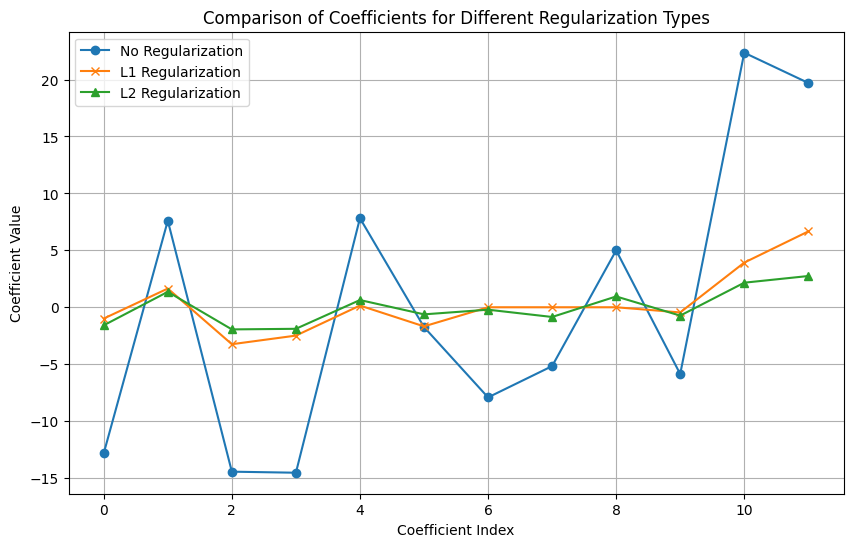

In [64]:
# Plot the coefficients for each model (No regularization, L1, L2)
coefficients_l1 = pipeline_l1.named_steps['classifier'].coef_
coefficients_l2 = pipeline_l2.named_steps['classifier'].coef_

plt.figure(figsize=(10, 6))
plt.plot(coefficients_none.flatten(), label="No Regularization", marker='o')
plt.plot(coefficients_l1.flatten(), label="L1 Regularization", marker='x')
plt.plot(coefficients_l2.flatten(), label="L2 Regularization", marker='^')
plt.title('Comparison of Coefficients for Different Regularization Types')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True)
plt.show()

# ***Section-2: The Complete Code***

Mean of coefficients (No regularization): 8.289665250534503e-15
Standard deviation of coefficients (No regularization): 12.049563434421833

With L1 Regularization:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Mean of coefficients (L1 regularization): 0.29331009829056565
Standard deviation of coefficients (L1 regularization): 2.61704154520198

With L2 Regularization:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.

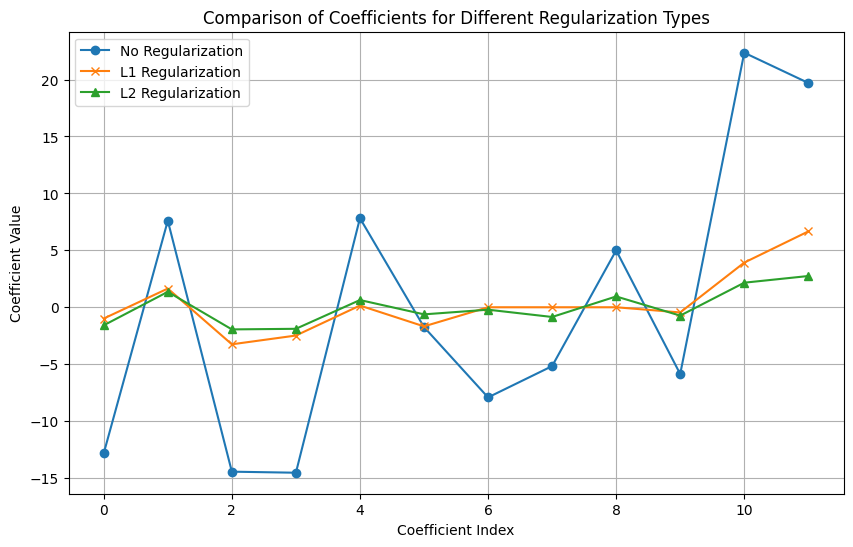

In [65]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

# Step 1: Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Step 2: Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create a pipeline and fit the model without regularization
pipeline_none = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', LogisticRegression(penalty=None, max_iter=1000))  # No regularization
])
pipeline_none.fit(X_train, y_train)

# Extract and compare coefficients
coefficients_none = pipeline_none.named_steps['classifier'].coef_
mean_none = np.mean(coefficients_none)
std_none = np.std(coefficients_none)

print(f"Mean of coefficients (No regularization): {mean_none}")
print(f"Standard deviation of coefficients (No regularization): {std_none}")

# Step 4: Fit the model with L1 regularization
pipeline_l1 = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000))  # L1 regularization
])
pipeline_l1.fit(X_train, y_train)
y_pred_l1 = pipeline_l1.predict(X_test)

# Print classification report and confusion matrix for the model with L1 regularization
print("\nWith L1 Regularization:")
print("Classification Report:")
print(classification_report(y_test, y_pred_l1))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_l1))

# Compare coefficients for L1 regularization
coefficients_l1 = pipeline_l1.named_steps['classifier'].coef_
mean_l1 = np.mean(coefficients_l1)
std_l1 = np.std(coefficients_l1)

print(f"Mean of coefficients (L1 regularization): {mean_l1}")
print(f"Standard deviation of coefficients (L1 regularization): {std_l1}")

# Step 5: Fit the model with L2 regularization
pipeline_l2 = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', LogisticRegression(penalty='l2', max_iter=1000))  # L2 regularization
])
pipeline_l2.fit(X_train, y_train)
y_pred_l2 = pipeline_l2.predict(X_test)

# Print classification report and confusion matrix for the model with L2 regularization
print("\nWith L2 Regularization:")
print("Classification Report:")
print(classification_report(y_test, y_pred_l2))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_l2))

# Compare coefficients for L2 regularization
coefficients_l2 = pipeline_l2.named_steps['classifier'].coef_
mean_l2 = np.mean(coefficients_l2)
std_l2 = np.std(coefficients_l2)

print(f"Mean of coefficients (L2 regularization): {mean_l2}")
print(f"Standard deviation of coefficients (L2 regularization): {std_l2}")

# Comparison of results
print("\nComparison of Results:")
if std_none < std_l1 and std_none < std_l2:
    print("The model without regularization shows the most stable coefficients.")
elif std_l1 < std_none and std_l1 < std_l2:
    print("The model with L1 regularization shows the most stable coefficients.")
else:
    print("The model with L2 regularization shows the most stable coefficients.")

# Step 6: Custom classification report function based on confusion matrix
def my_classification_report(conf_matrix):
    total_samples = conf_matrix.sum()
    true_pos = np.diag(conf_matrix)
    false_pos = conf_matrix.sum(axis=0) - true_pos
    false_neg = conf_matrix.sum(axis=1) - true_pos

    accuracy = true_pos.sum() / total_samples
    print(f"Accuracy: {accuracy:.2f}")

    for i in range(len(conf_matrix)):
        precision = true_pos[i] / (true_pos[i] + false_pos[i]) if (true_pos[i] + false_pos[i]) != 0 else 0
        recall = true_pos[i] / (true_pos[i] + false_neg[i]) if (true_pos[i] + false_neg[i]) != 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

        print(f"Class {i}: Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1_score:.2f}")

# Calculate confusion matrices for all models
conf_matrix_none = confusion_matrix(y_test, y_pred_none)
conf_matrix_l1 = confusion_matrix(y_test, y_pred_l1)
conf_matrix_l2 = confusion_matrix(y_test, y_pred_l2)

# Apply custom report function to each model
print("\nCustom Report - No Regularization:")
my_classification_report(conf_matrix_none)

print("\nCustom Report - L1 Regularization:")
my_classification_report(conf_matrix_l1)

print("\nCustom Report - L2 Regularization:")
my_classification_report(conf_matrix_l2)

# Step 7: Visualizing Coefficients
coefficients_l1 = pipeline_l1.named_steps['classifier'].coef_
coefficients_l2 = pipeline_l2.named_steps['classifier'].coef_

plt.figure(figsize=(10, 6))
plt.plot(coefficients_none.flatten(), label="No Regularization", marker='o')
plt.plot(coefficients_l1.flatten(), label="L1 Regularization", marker='x')
plt.plot(coefficients_l2.flatten(), label="L2 Regularization", marker='^')
plt.title('Comparison of Coefficients for Different Regularization Types')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True)
plt.show()
